In [2]:
!pip install graphviz

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


### let's first test graphviz on example instance

In [24]:
from graphviz import Graph, Digraph


In [25]:
myColorPalette = ["#d82014", "#dfd116", "#abe318", "#69eea8", "#ace764", "#cdc592", "#0e29db", "#8d3ccd", "#d96f7c", "#49346a"]

In [26]:
# Create Digraph object
dot = Digraph()

In [27]:
# Add nodes 1 and 2
dot.node('1', fillcolor=myColorPalette[0], style="filled")
dot.node('2')

# Add edge between 1 and 2
dot.edges(['12'])

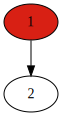

In [28]:
dot

# Coloring graph problem

reminder: Graph coloring problem is to assign colors to certain elements of a graph subject to certain constraints. Vertex coloring is the most common graph coloring problem. The problem is, given m colors, find a way of coloring the vertices of a graph such that no two adjacent vertices are colored using same color.

In [100]:
import random

def generateRandomGraph(n, p, withRandomColor = False):
    """
        Function inspired by the Algo1 course given by nicolas Lehir: nicolaslehir@gmail.com
        
        Function used to generate a random undirected graph.

        :param n: number of nodes in the graph
        :param p: number of edges in the graph

        Libraries used :
        ----------------
        networkx
        matplotlib

    """
    if p > n * (n - 1) / 2:
        raise ValueError('The number of edges is too large !')
    
    dot = Graph()
    # in an undirected graph, we dont need to consider the inverse of an edge
    all_edges = [{i, j} for i in range(1, n + 1) for j in range(i + 1, n + 1)]
    # remove edges from one node to itself
    all_edges = [edge for edge in all_edges if len(edge) == 2]

    # shuffle the order of the edges
    random.shuffle(all_edges)

    # double check that we did not make an error while creating our set of edges
    if len(all_edges) == n * (n - 1) / 2:
        print(f"il y a bien n(n-1)/2= {int((n * (n - 1))/2)} arêtes possibles")
    
    nodes = [i for i in range(1, n + 1)]
    edges = []
    for j in range(p - 1):
        random_edge = all_edges.pop()
        node_a = random_edge.pop()
        node_b = random_edge.pop()
        edges.append((node_a, node_b))
        
    colors = []
    if withRandomColor == True:
        for i in range(n):
            colors.append(random.randint(0, len(myColorPalette) - 1))
    
    return (nodes, edges, colors)

randomGraph = generateRandomGraph(10, 20, True)
randomGraph

il y a bien n(n-1)/2= 45 arêtes possibles


([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [(10, 5),
  (10, 3),
  (1, 6),
  (8, 4),
  (1, 5),
  (8, 2),
  (8, 1),
  (8, 9),
  (2, 3),
  (8, 6),
  (8, 10),
  (9, 6),
  (9, 5),
  (9, 10),
  (5, 6),
  (8, 5),
  (8, 3),
  (1, 9),
  (1, 2)],
 [0, 7, 4, 3, 1, 1, 2, 9, 1, 0])

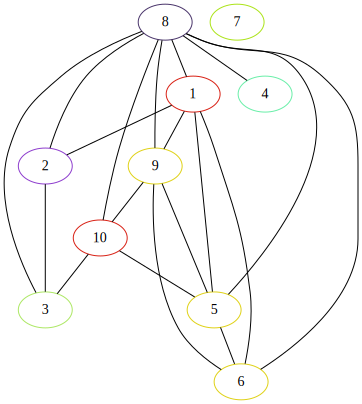

In [102]:
def transformGraphToDot(nodes, edges, colors=[], fileName=None):
    dot = Graph()
    
    for i in range(len(nodes)):
        if i < len(colors):
            dot.node(str(nodes[i]), color = myColorPalette[colors[i]])
        else:
            dot.node(str(nodes[i]))
    for node in nodes:
        dot.node(str(node))
    
    for a, b in edges:
        dot.edge(str(a), str(b))
    
    if fileName != None:
        # visualize the graph
        graph_name = 'graphs/' + fileName
        dot.render(graph_name)
    
    return dot

dot = transformGraphToDot(randomGraph[0], randomGraph[1], randomGraph[2])
dot

In [113]:
randomGraph = generateRandomGraph(100, 300)

il y a bien n(n-1)/2= 4950 arêtes possibles


# Solving Algorithm
## Greedy algorithm
Let's implement a greedy algorithm with a very simple heuristic: just take a color that is not already taken by the neighbours

number of colors in the graph: 5


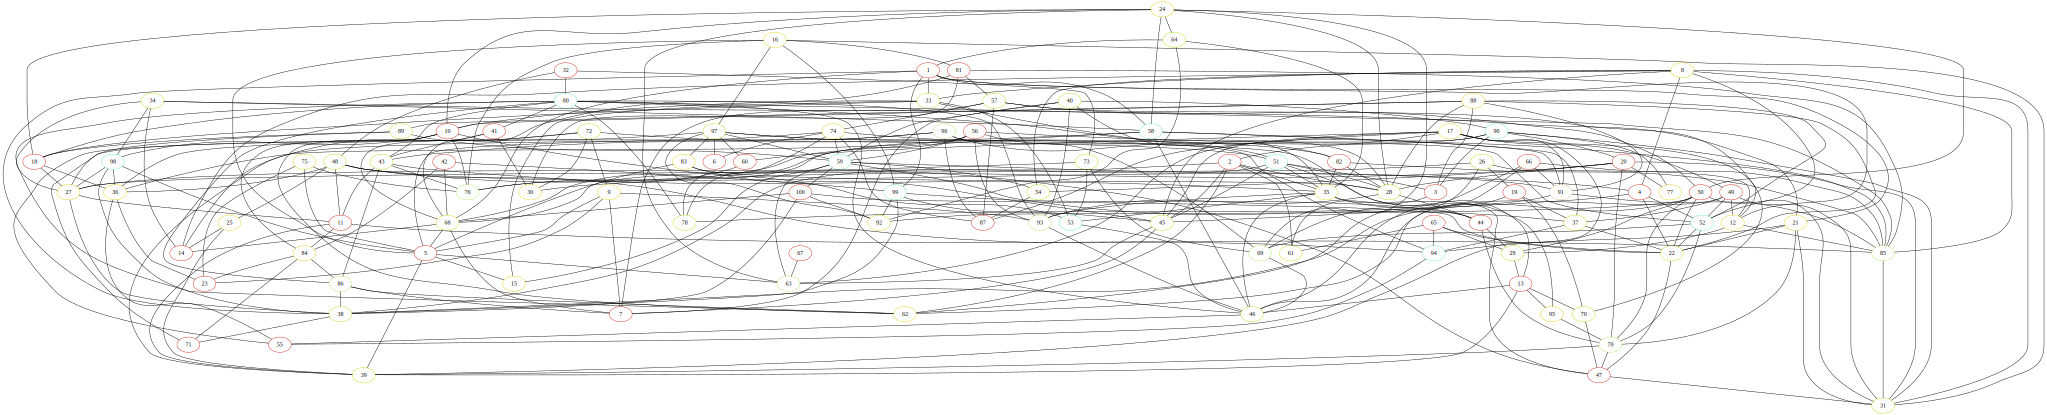

In [114]:
def greedyColoring(nodes, edges):
    colors = []
    
    # fill colors to None at the beginning
    for i in range(len(nodes)):
        colors.append(None)
    
    # for each node
    for i in range(len(nodes)):
        # get the neighbours
        colorNeighbour = [colors[item[1] - 1] for item in edges if nodes[i] == item[0]] + [colors[item[0] - 1] for item in edges if nodes[i] == item[1]]
        
        # print the neighbours
        #print(f"node: {nodes[i]} : {colorNeighbour}")
        
        # for each colors of the colorPalette
        for j in range(len(myColorPalette)):
            
            # if the color is not already in use by any neighbour
            if j not in colorNeighbour:
                colors[i] = j
                # the color has been set, we pass to the next node
                break
            # here is the else part, continue...

    return (colors)

colors = greedyColoring(randomGraph[0], randomGraph[1])
print(f"number of colors in the graph: {max(colors)}")
dot = transformGraphToDot(randomGraph[0], randomGraph[1], colors, fileName = "randomColoring")
dot